In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
s = os.listdir()
s.sort()
info = {}
for file in s:
    if 'PLRU_32KB_8way_PLRU_256KB_8way.pickle' in file:
        with open(file,'rb') as f:
            print(file.split('_')[0])
            info[file.split('_')[0]] = pickle.load(f)

PLRU


In [3]:
print(info.keys())
print(info['PLRU'].keys())
print(info['PLRU']['403.gcc'].keys())
print(info['PLRU']['403.gcc']['l1'].keys())

dict_keys(['PLRU'])
dict_keys(['435.gromacs', '434.zeusmp', '464.h264ref', 'info.txt', '473.astar', '482.sphinx3', '462.libquantum', '445.gobmk', '401.bzip2', '437.leslie3d', '433.milc', '458.sjeng', '450.soplex', '436.cactusADM', '456.hmmer', '471.omnetpp', '459.GemsFDTD', '444.namd', '429.mcf', '481.wrf', '403.gcc', '447.dealII', '470.lbm', '483.xalancbmk'])
dict_keys(['l1', 'l2'])
dict_keys(['hits', 'miss', 'setCache', 'wayCache', 'metaCache'])


In [4]:
traces = []
for k in info['PLRU']:
    a = info['PLRU'][k]
    if type(a)==type({}):
        traces.append(k)
traces.sort()

In [5]:
l1hitRates = {}
for alg in info:
    print(alg)
    l1hitRates[alg] = []
    for k in traces:
        a = info[alg][k]['l1']
        if type(a)==type({}):
            hits = info[alg][k]['l1']['hits']
            miss = info[alg][k]['l1']['miss']
            l1hitRates[alg].append(hits/(hits+miss))

PLRU


In [6]:
l2hitRates = {}
for alg in info:
    print(alg)
    l2hitRates[alg] = []
    for k in traces:
        a = info[alg][k]['l2']
        if type(a)==type({}):
            hits = info[alg][k]['l2']['hits']
            miss = info[alg][k]['l2']['miss']
            l2hitRates[alg].append(hits/(hits+miss))

PLRU


In [7]:
for alg in l1hitRates:
    print(alg, round(np.mean(l1hitRates[alg])*100,2))
for alg in l2hitRates:
    print(alg, round(np.mean(l2hitRates[alg])*100,2))

PLRU 73.32
PLRU 85.64


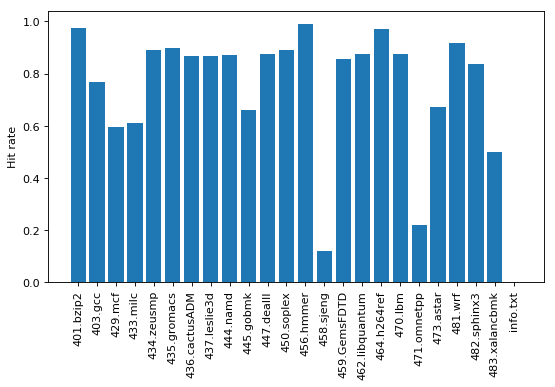

In [8]:
plt.figure(num=None, figsize=(8,4.5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(l1hitRates['PLRU'])),l1hitRates['PLRU'])
plt.xticks(range(len(traces)), traces, rotation='vertical')
plt.ylabel('Hit rate')
plt.show()

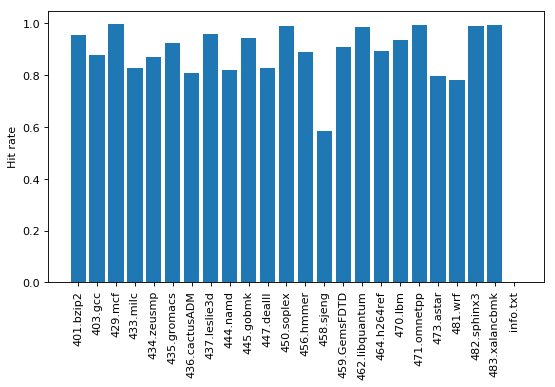

In [9]:
plt.figure(num=None, figsize=(8,4.5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(l2hitRates['PLRU'])),l2hitRates['PLRU'])
plt.xticks(range(len(traces)), traces, rotation='vertical')
plt.ylabel('Hit rate')
plt.show()

['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '481.wrf', '482.sphinx3', '483.xalancbmk']
[0.7716039324316984, 0.7659189252801767, 0.7814651868749962, 0.8793766608931456, 0.7818504235591847, 0.7814651868749962, 0.905104034021529, 0.7716039324316984, 0.933580367614369, 0.9232544151342695]


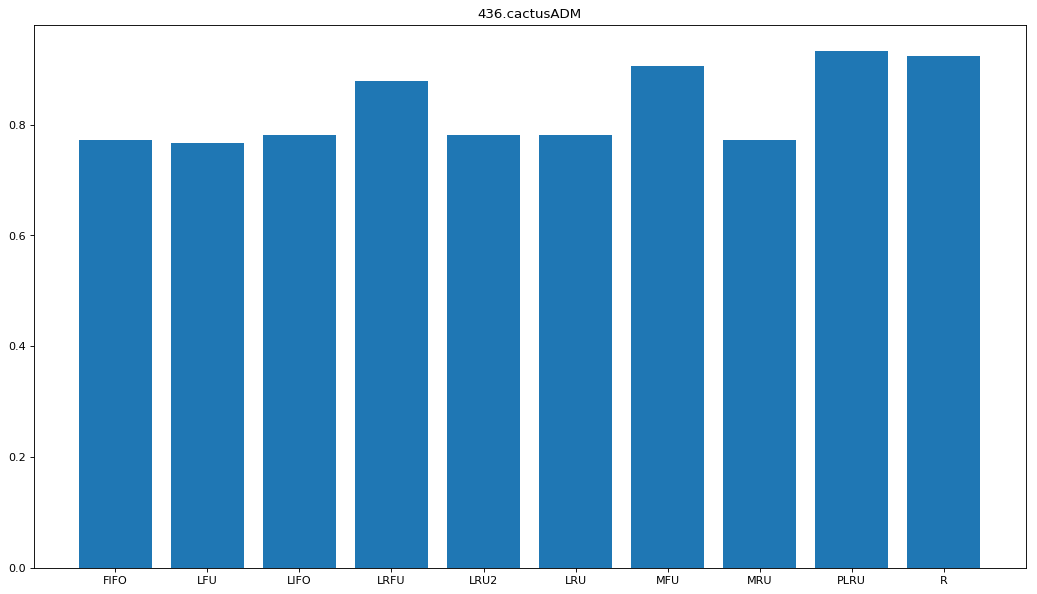

In [37]:
print(traces)
tr = traces.index('436.cactusADM')
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(hitRates)),[hitRates[alg][tr] for alg in hitRates])
plt.xticks(range(len(hitRates)), [alg for alg in hitRates])
plt.title('436.cactusADM')
print([hitRates[alg][tr] for alg in hitRates])
#plt.ylim(.7,.8)
plt.show()

[0.6322992066910263, 0.6336329660863887, 0.6335496061241785, 0.6335496061241785, 0.6333412062186532, 0.6335496061241785, 0.630493074176473, 0.6322992066910263, 0.6332022729483029, 0.6330494463509176]


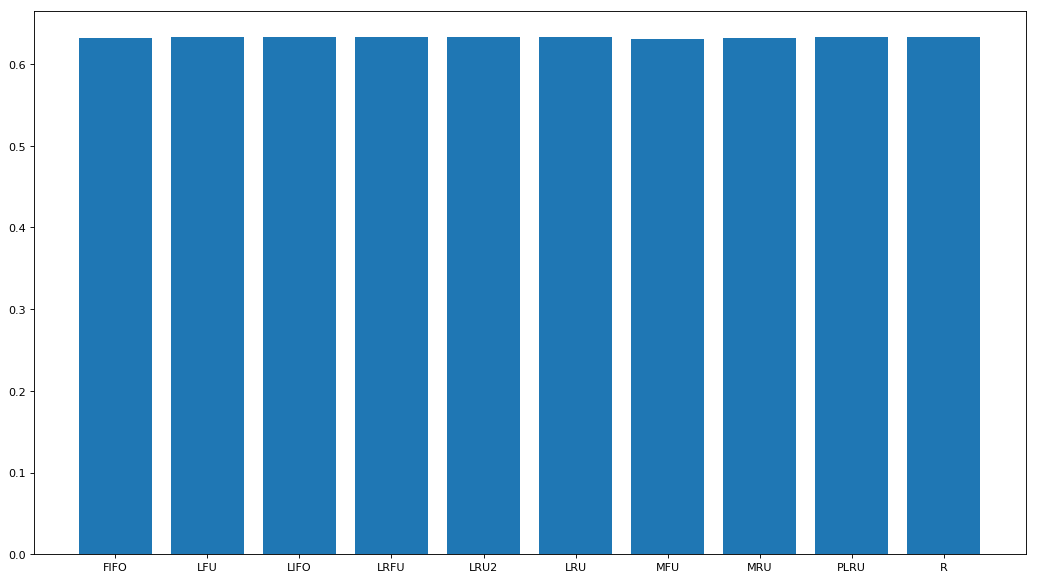

In [38]:
tr = traces.index('458.sjeng')
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(hitRates)),[hitRates[alg][tr] for alg in hitRates])
plt.xticks(range(len(hitRates)), [alg for alg in hitRates])
print([hitRates[alg][tr] for alg in hitRates])
#plt.ylim(.7,.8)
plt.show()

['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '481.wrf', '482.sphinx3', '483.xalancbmk']
[0.9924757004002287, 0.9924757004002287, 0.9924757004002287, 0.9924757004002287, 0.9924757004002287, 0.9924757004002287, 0.9924757004002287, 0.9924757004002287, 0.9924757004002287, 0.9924757004002287]


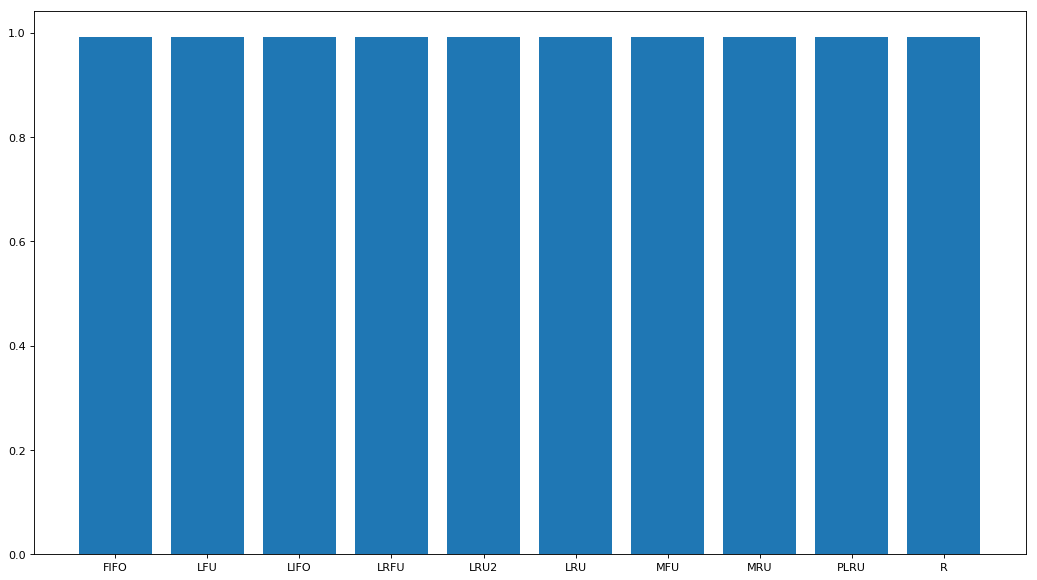

In [39]:
print(traces)
tr = traces.index('435.gromacs')
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(hitRates)),[hitRates[alg][tr] for alg in hitRates])
plt.xticks(range(len(hitRates)), [alg for alg in hitRates])
print([hitRates[alg][tr] for alg in hitRates])
#plt.ylim(.7,.8)
plt.show()

In [11]:
setCache = info['PLRU']['436.cactusADM']['l2']['setCache']
wayCache = info['PLRU']['436.cactusADM']['l2']['wayCache']

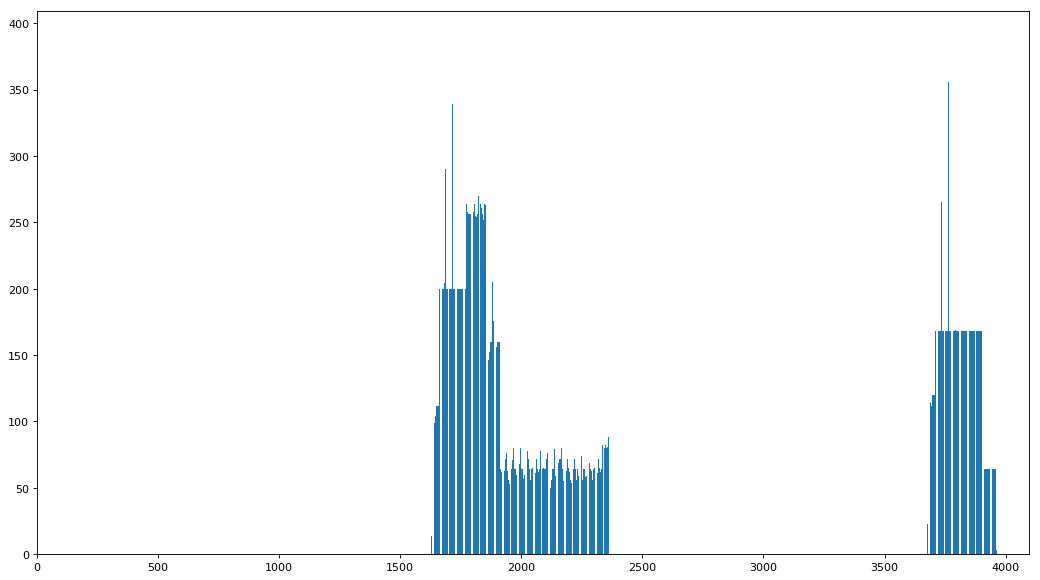

4096 8


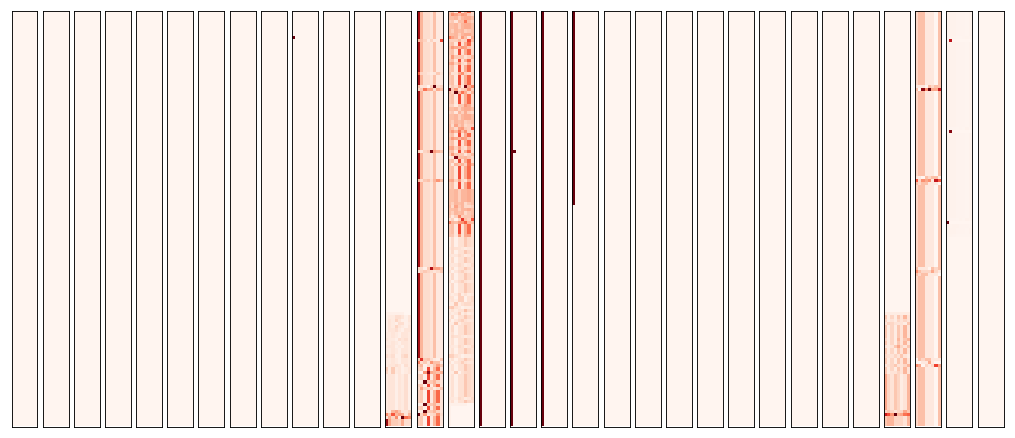

In [16]:
setSize = len(setCache)
plt.figure(num=None, figsize=(8.4.5), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,setSize)
plt.bar(range(setSize), setCache)
plt.show()

setLen = 128
print(len(wayCache), len(wayCache[0]))
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
for i in range(setSize // setLen):
    plt.subplot(1, setSize // setLen, i + 1)
    plt.imshow(wayCache[i * setLen:(i + 1) * setLen], cmap='Reds', interpolation='nearest')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()